#### 1. Importing the libraries

In [1]:
## Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer

from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_roc_curve, plot_confusion_matrix

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import shap

import missingno as msno

import warnings
warnings.filterwarnings("ignore")


#### 2. Exploratory Data Analysis

In [2]:
# pd.set_option('max_columns', 100)
# pd.set_option('max_rows', 190)
# pd.set_option('max_colwidth', 200)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# no fo rows and no of columns
df.shape

(7043, 21)

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# duplicated and missing value check
df.duplicated().sum()

0

##### 2.1 Missing value analysis

In [6]:
def missing(df): 
    missing_no = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_value_analysis = pd.concat([missing_no, missing_percent], axis = 1, keys = ['Missing_No', 'Missing_%'])
    
    return missing_value_analysis

In [7]:
missing(df)

,Missing_No,Missing_%
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### dropping the customer id from the data and converting the TotalCharges into float 

In [9]:
df1 = df.drop(columns = 'customerID', axis = 1).copy()
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 2.2 Target Analysis

% of churn :  26.54 % --> 1869 customers
% of non churn :  73.46 % --> 5174 customers


<AxesSubplot:xlabel='Churn', ylabel='count'>

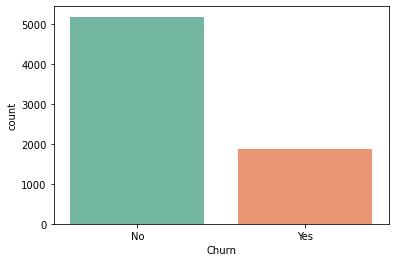

In [10]:
df1['Churn'].value_counts()
print('% of churn : ', round((df1['Churn'].value_counts()[1] / df1.shape[0]) * 100, 2), '%', '-->', df1['Churn'].value_counts()[1], 'customers' )
print('% of non churn : ', round((df1['Churn'].value_counts()[0] / df1.shape[0]) * 100, 2), '%', '-->', df1['Churn'].value_counts()[0], 'customers')
sns.countplot(x = 'Churn', data = df1,  palette = "Set2")

#### Tranfomring the target varibale to 0 and 1

In [11]:
le = LabelEncoder()
df1['Churn'] = le.fit_transform(df1['Churn'])
df1['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

#### 2.2. Numerical feature Analysis 

In [12]:
numerical = df1.select_dtypes('number').columns
categorical = df1.select_dtypes('object').columns
print('numerical columns: ', list(numerical))
print('categorical columns: ', list(categorical))

numerical columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
categorical columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [13]:
# Numerical features
df1[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


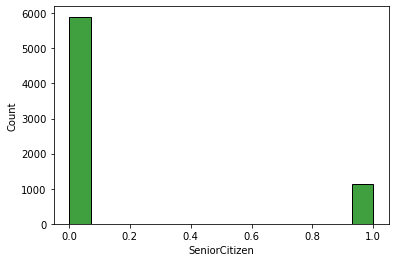

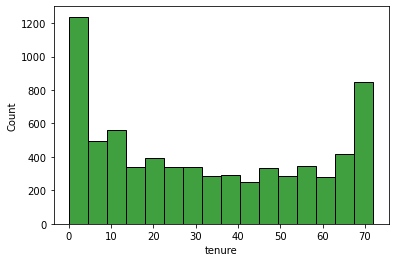

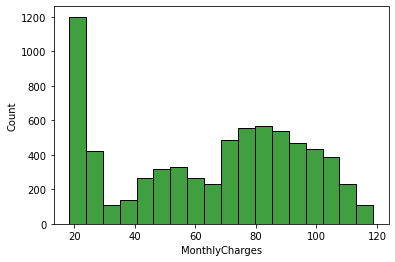

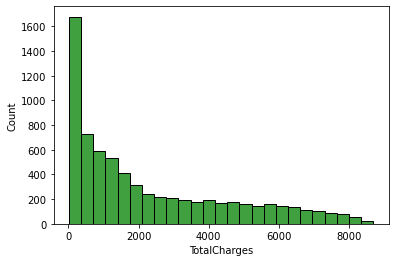

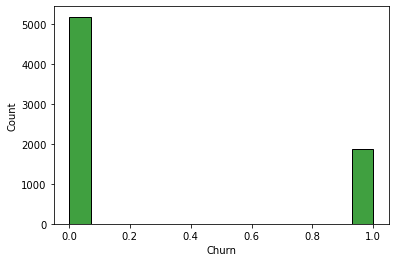

In [14]:
# univariate Analysis
for i, col in enumerate(numerical):
    plt.figure(i)
    sns.histplot(df1[col], color = 'green')

In [15]:
df1[numerical]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


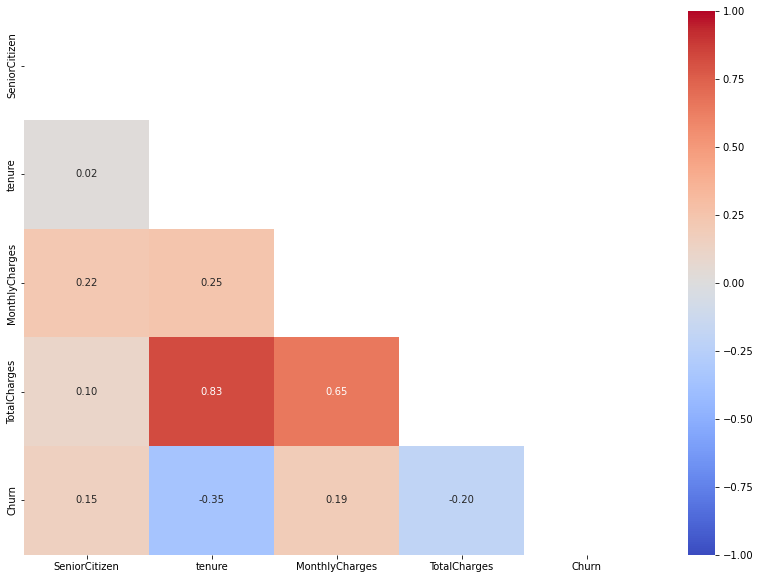

In [16]:
# correlation
#sns.heatmap(df1[numerical], annot = True)
matrix = np.triu(df1[numerical].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df1[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

##### Inferences 
1. Based on the matrix, we can observe weak level correlation between the numerical features and the target variable
2. There is strong correlation between tenure and total charges.
3. Being senior citizen and increasing monthly charges have a positive correlation with the churn.
4. Senior citizen more likely churn than younger customers.
5. Customer with higher monthly charges also more likely churn than lesser monthly charges customers.
6. Being long term with the company, customer less likely churn than customer with lesser time with the company.
7. Total charges has negative correlation with the churn.

#### 2.3 Categorical Feature Analysis

In [17]:
# Let's see cardinality of the categorical features.
df1[categorical].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

In [18]:
# unique values in every feature
for i in categorical: 
    print( i, df1[i].unique() )

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


1. We can see that No internet service is repeating several times in the features and in this problem at hand, it gives same meaning as No
2. So we can change them to No and then features will have two unique values,
3. Also MultipleLines has No phone service option, which in this problem gives same meaning as No so we can change it to No and do the same thing for this feature.

#### Bivariate Analysis

In [19]:
df1[['gender', "Churn"]].head()

,gender,Churn
0,Female,0
1,Male,0
2,Male,1
3,Male,0
4,Female,1


In [20]:
# 1. Gender and Churn 
print("churn % in male : ", round(df1[(df1['gender']== 'Male') & (df1['Churn']== 1)].shape[0] / df1[df1['gender']== 'Male'].shape[0] * 100, 2))
print("churn % in female : ", round(df1[(df1['gender']== 'Female') & (df1['Churn']== 1)].shape[0] / df1[df1['gender']== 'Female'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "gender", color = "Churn")
fig

churn % in male :  26.16
churn % in female :  26.92


#### There is not much difference between gender on the churn rate.

In [21]:
# 2. Having partner and churn 
print("churn % in having a partner : ", round(df1[(df1['Partner']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['Partner']== 'Yes'].shape[0] * 100, 2))
print("churn % in not having a partner : ", round(df1[(df1['Partner']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['Partner']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "Partner", color = "Churn")
fig

churn % in having a partner :  19.66
churn % in not having a partner :  32.96


#### Customer without any relationship, single customer almost 1.7 times more likely churn than cutomer with a partner.

In [22]:
#3. having dependents and churn 
print("churn % with dependents : ", round(df1[(df1['Dependents']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['Dependents']== 'Yes'].shape[0] * 100, 2))
print("churn % without any dependents : ", round(df1[(df1['Dependents']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['Dependents']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "Dependents", color = "Churn")
fig

churn % with dependents :  15.45
churn % without any dependents :  31.28


##### Customer without any dependents, almost 2.03 times more likely churn than cutomer with a dependent.

In [23]:
#4. Phone Service and Churn  
print("churn % with phone service : ", round(df1[(df1['PhoneService']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['PhoneService']== 'Yes'].shape[0] * 100, 2))
print("churn % without phone service : ", round(df1[(df1['PhoneService']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['PhoneService']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "PhoneService", color = "Churn")
fig

churn % with phone service :  26.71
churn % without phone service :  24.93


##### Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small.

In [24]:
#5. Multiple Lines and Churn 
df1['MultipleLines'] = df1['MultipleLines'].replace("No phone service", "No")
print("churn % with multiple lines : ", round(df1[(df1['MultipleLines']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['MultipleLines']== 'Yes'].shape[0] * 100, 2))
print("churn % without multiple lines : ", round(df1[(df1['MultipleLines']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['MultipleLines']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "MultipleLines", color = "Churn")
fig

churn % with multiple lines :  28.61
churn % without multiple lines :  25.02


##### Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.

In [25]:
#5. Internet Service and Churn 
print("churn % in DSL Internet service : ", round(df1[(df1['InternetService']== 'DSL') & (df1['Churn']== 1)].shape[0] / df1[df1['InternetService']== 'DSL'].shape[0] * 100, 2))
print("churn % in Fiber optic Internet service : ", round(df1[(df1['InternetService']== 'Fiber optic') & (df1['Churn']== 1)].shape[0] / df1[df1['InternetService']== 'Fiber optic'].shape[0] * 100, 2))
print("churn % in No Internet service : ", round(df1[(df1['InternetService']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['InternetService']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "InternetService", color = "Churn")
fig

churn % in DSL Internet service :  18.96
churn % in Fiber optic Internet service :  41.89
churn % in No Internet service :  7.4


##### 
1. Customer with fiber optic internet with the company compare to customer without any internet service with the company 5.66 times more likely to churn.
2. Customer with fiber optic internet with the company compare to customer with DSL internet service with the company almost 2.21 times more likely to churn.
3. Customer with DSL internet service with the company compare to customer without any internet service with the company 2.56 times more likley to churn.

In [26]:
#5. Online Security and Churn 
df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')
print("churn % with OnlineSecurity : ", round(df1[(df1['OnlineSecurity']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['OnlineSecurity']== 'Yes'].shape[0] * 100, 2))
print("churn % without OnlineSecurity lines : ", round(df1[(df1['OnlineSecurity']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['OnlineSecurity']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "OnlineSecurity", color = "Churn")
fig

churn % with OnlineSecurity :  14.61
churn % without OnlineSecurity lines :  31.33


##### A customer with an online security service with the company almost 2.14 times less likely to leave the company than a customer without any online security service with the company.

In [27]:
# 6. Online OnlineBackup and Churn 
print("churn % with OnlineBackup : ", round(df1[(df1['OnlineBackup']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['OnlineBackup']== 'Yes'].shape[0] * 100, 2))
print("churn % without OnlineBackup : ", round(df1[(df1['OnlineBackup']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['OnlineBackup']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "OnlineBackup", color = "Churn")
fig

churn % with OnlineBackup :  21.53
churn % without OnlineBackup :  29.17


In [28]:
# 7. DeviceProtection and Churn 
print("churn % with DeviceProtection : ", round(df1[(df1['DeviceProtection']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['DeviceProtection']== 'Yes'].shape[0] * 100, 2))
print("churn % without DeviceProtection : ", round(df1[(df1['DeviceProtection']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['DeviceProtection']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "OnlineBackup", color = "Churn")
fig

churn % with DeviceProtection :  22.5
churn % without DeviceProtection :  28.65


#### A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.

In [29]:
# 7. TechSupport and Churn 
print("churn % with TechSupport : ", round(df1[(df1['TechSupport']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['TechSupport']== 'Yes'].shape[0] * 100, 2))
print("churn % without TechSupport : ", round(df1[(df1['TechSupport']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['TechSupport']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "TechSupport", color = "Churn")
fig

churn % with TechSupport :  15.17
churn % without TechSupport :  31.19


##### A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.

In [30]:
# 8. StreamingTV and Churn 
print("churn % with StreamingTV : ", round(df1[(df1['StreamingTV']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['StreamingTV']== 'Yes'].shape[0] * 100, 2))
print("churn % without StreamingTV : ", round(df1[(df1['StreamingTV']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['StreamingTV']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "StreamingTV", color = "Churn")
fig

churn % with StreamingTV :  30.07
churn % without StreamingTV :  24.33


##### A customer with a Streaming TV service with the company almost 1.24 times more likely to leave the company than a customer without any a Streaming TV service with the company.

In [31]:
# 8. StreamingTV and Churn 
print("churn % with StreamingMovies : ", round(df1[(df1['StreamingMovies']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['StreamingMovies']== 'Yes'].shape[0] * 100, 2))
print("churn % without StreamingMovies : ", round(df1[(df1['StreamingMovies']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['StreamingMovies']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "StreamingMovies", color = "Churn")
fig

churn % with StreamingMovies :  29.94
churn % without StreamingMovies :  24.38


##### A customer with a Streaming Movies service with the company almost 1.23 times more likely to leave the company than a customer without any a Streaming movies service with the company.

In [32]:
# 9. Contract and Churn 
print("churn % with Month-to-month contract : ", round(df1[(df1['Contract']== 'Month-to-month') & (df1['Churn']== 1)].shape[0] / df1[df1['Contract']== 'Month-to-month'].shape[0] * 100, 2))
print("churn % without One year contract : ", round(df1[(df1['Contract']== 'One year') & (df1['Churn']== 1)].shape[0] / df1[df1['Contract']== 'One year'].shape[0] * 100, 2))
print("churn % with Two year contract : ", round(df1[(df1['Contract']== 'Two year') & (df1['Churn']== 1)].shape[0] / df1[df1['Contract']== 'Two year'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "Contract", color = "Churn")
fig

churn % with Month-to-month contract :  42.71
churn % without One year contract :  11.27
churn % with Two year contract :  2.83


##### 
1. Great differences based on the contract were seen in the histogram and mean differences.
2. Customer with the 2 year contract almost 15.1 times less likely to churn compare to customer with a monthly contract.
3. On the other hand customer with the 1 year contract almost 3.79 times less likely to churn compare to customer with a monthly contract.

In [33]:
# 10. PaperlessBilling and Churn 
print("churn % with PaperlessBilling : ", round(df1[(df1['PaperlessBilling']== 'Yes') & (df1['Churn']== 1)].shape[0] / df1[df1['PaperlessBilling']== 'Yes'].shape[0] * 100, 2))
print("churn % without PaperlessBilling : ", round(df1[(df1['PaperlessBilling']== 'No') & (df1['Churn']== 1)].shape[0] / df1[df1['PaperlessBilling']== 'No'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "PaperlessBilling", color = "Churn")
fig

churn % with PaperlessBilling :  33.57
churn % without PaperlessBilling :  16.33


##### A customer with a paperless billing with the company almost 2.06 times more likely to leave the company than a customer without a paperless billing with the company.

In [34]:
# 11. PaymentMethod and Churn 
print("churn % with Electronic check : ", round(df1[(df1['PaymentMethod']== 'Electronic check') & (df1['Churn']== 1)].shape[0] / df1[df1['PaymentMethod']== 'Electronic check'].shape[0] * 100, 2))
print("churn % Mailed check : ", round(df1[(df1['PaymentMethod']== 'Mailed check') & (df1['Churn']== 1)].shape[0] / df1[df1['PaymentMethod']== 'Mailed check'].shape[0] * 100, 2))
print("churn % Bank transfer (automatic) : ", round(df1[(df1['PaymentMethod']== 'Bank transfer (automatic)') & (df1['Churn']== 1)].shape[0] / df1[df1['PaymentMethod']== 'Bank transfer (automatic)'].shape[0] * 100, 2))
print("churn % Credit card (automatic) : ", round(df1[(df1['PaymentMethod']== 'Credit card (automatic)') & (df1['Churn']== 1)].shape[0] / df1[df1['PaymentMethod']== 'Credit card (automatic)'].shape[0] * 100, 2))
fig = px.histogram(df1, x = "PaymentMethod", color = "Churn")
fig

churn % with Electronic check :  45.29
churn % Mailed check :  19.11
churn % Bank transfer (automatic) :  16.71
churn % Credit card (automatic) :  15.24


##### Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.

#### 3. Splitting the data 

In [42]:
# Encoding the catgerocal features 
le = LabelEncoder()
for i in categorical: 
    df1[i] = le.fit_transform(df1[i])

X = df1.drop('Churn', axis = 1)
y = df1['Churn']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7043, 19)
(7043,)
(5634, 19)
(1409, 19)
(5634,)
(1409,)


#### 4. Building ML models 

Learning rate set to 0.021554
0:	learn: 0.6785362	total: 3.46ms	remaining: 3.46s
1:	learn: 0.6659944	total: 7.16ms	remaining: 3.57s
2:	learn: 0.6528222	total: 11.2ms	remaining: 3.72s
3:	learn: 0.6407424	total: 14.8ms	remaining: 3.69s
4:	learn: 0.6286206	total: 21.5ms	remaining: 4.28s
5:	learn: 0.6172664	total: 24.7ms	remaining: 4.1s
6:	learn: 0.6071107	total: 27.9ms	remaining: 3.95s
7:	learn: 0.5971531	total: 30.8ms	remaining: 3.82s
8:	learn: 0.5868626	total: 34ms	remaining: 3.74s
9:	learn: 0.5781774	total: 37.4ms	remaining: 3.7s
10:	learn: 0.5695557	total: 40.3ms	remaining: 3.63s
11:	learn: 0.5617901	total: 43ms	remaining: 3.54s
12:	learn: 0.5542320	total: 45.8ms	remaining: 3.48s
13:	learn: 0.5478685	total: 48.3ms	remaining: 3.4s
14:	learn: 0.5415923	total: 51ms	remaining: 3.35s
15:	learn: 0.5357863	total: 53.6ms	remaining: 3.29s
16:	learn: 0.5298063	total: 56.2ms	remaining: 3.25s
17:	learn: 0.5243155	total: 58.8ms	remaining: 3.21s
18:	learn: 0.5189095	total: 61.4ms	remaining: 3.17s
1

191:	learn: 0.3891991	total: 539ms	remaining: 2.27s
192:	learn: 0.3891680	total: 541ms	remaining: 2.26s
193:	learn: 0.3889890	total: 544ms	remaining: 2.26s
194:	learn: 0.3888077	total: 548ms	remaining: 2.26s
195:	learn: 0.3886966	total: 551ms	remaining: 2.26s
196:	learn: 0.3884579	total: 554ms	remaining: 2.26s
197:	learn: 0.3883999	total: 557ms	remaining: 2.25s
198:	learn: 0.3883044	total: 559ms	remaining: 2.25s
199:	learn: 0.3881545	total: 563ms	remaining: 2.25s
200:	learn: 0.3879716	total: 566ms	remaining: 2.25s
201:	learn: 0.3877872	total: 568ms	remaining: 2.25s
202:	learn: 0.3876304	total: 571ms	remaining: 2.24s
203:	learn: 0.3874750	total: 574ms	remaining: 2.24s
204:	learn: 0.3872781	total: 576ms	remaining: 2.23s
205:	learn: 0.3870623	total: 579ms	remaining: 2.23s
206:	learn: 0.3869368	total: 582ms	remaining: 2.23s
207:	learn: 0.3868201	total: 585ms	remaining: 2.23s
208:	learn: 0.3866669	total: 588ms	remaining: 2.22s
209:	learn: 0.3865498	total: 590ms	remaining: 2.22s
210:	learn: 

376:	learn: 0.3655591	total: 1.06s	remaining: 1.75s
377:	learn: 0.3654813	total: 1.06s	remaining: 1.75s
378:	learn: 0.3653929	total: 1.07s	remaining: 1.75s
379:	learn: 0.3652614	total: 1.07s	remaining: 1.75s
380:	learn: 0.3651523	total: 1.07s	remaining: 1.74s
381:	learn: 0.3650610	total: 1.07s	remaining: 1.74s
382:	learn: 0.3649795	total: 1.08s	remaining: 1.74s
383:	learn: 0.3648831	total: 1.08s	remaining: 1.74s
384:	learn: 0.3647667	total: 1.08s	remaining: 1.73s
385:	learn: 0.3646590	total: 1.09s	remaining: 1.73s
386:	learn: 0.3645478	total: 1.09s	remaining: 1.73s
387:	learn: 0.3644389	total: 1.09s	remaining: 1.72s
388:	learn: 0.3643257	total: 1.09s	remaining: 1.72s
389:	learn: 0.3642251	total: 1.1s	remaining: 1.72s
390:	learn: 0.3640870	total: 1.1s	remaining: 1.72s
391:	learn: 0.3639948	total: 1.1s	remaining: 1.71s
392:	learn: 0.3638921	total: 1.11s	remaining: 1.71s
393:	learn: 0.3638410	total: 1.11s	remaining: 1.71s
394:	learn: 0.3636644	total: 1.11s	remaining: 1.7s
395:	learn: 0.36

548:	learn: 0.3463431	total: 1.58s	remaining: 1.3s
549:	learn: 0.3462557	total: 1.58s	remaining: 1.29s
550:	learn: 0.3461964	total: 1.59s	remaining: 1.29s
551:	learn: 0.3460381	total: 1.59s	remaining: 1.29s
552:	learn: 0.3458592	total: 1.59s	remaining: 1.29s
553:	learn: 0.3456744	total: 1.6s	remaining: 1.28s
554:	learn: 0.3455698	total: 1.6s	remaining: 1.28s
555:	learn: 0.3454811	total: 1.6s	remaining: 1.28s
556:	learn: 0.3454297	total: 1.6s	remaining: 1.28s
557:	learn: 0.3453112	total: 1.61s	remaining: 1.27s
558:	learn: 0.3452524	total: 1.61s	remaining: 1.27s
559:	learn: 0.3451484	total: 1.61s	remaining: 1.27s
560:	learn: 0.3450189	total: 1.62s	remaining: 1.26s
561:	learn: 0.3449211	total: 1.62s	remaining: 1.26s
562:	learn: 0.3447720	total: 1.62s	remaining: 1.26s
563:	learn: 0.3446437	total: 1.63s	remaining: 1.26s
564:	learn: 0.3445523	total: 1.63s	remaining: 1.25s
565:	learn: 0.3444024	total: 1.63s	remaining: 1.25s
566:	learn: 0.3443086	total: 1.63s	remaining: 1.25s
567:	learn: 0.344

729:	learn: 0.3283076	total: 2.09s	remaining: 773ms
730:	learn: 0.3282155	total: 2.09s	remaining: 770ms
731:	learn: 0.3281039	total: 2.1s	remaining: 767ms
732:	learn: 0.3279504	total: 2.1s	remaining: 765ms
733:	learn: 0.3278404	total: 2.1s	remaining: 762ms
734:	learn: 0.3277787	total: 2.11s	remaining: 760ms
735:	learn: 0.3277014	total: 2.11s	remaining: 757ms
736:	learn: 0.3276354	total: 2.11s	remaining: 754ms
737:	learn: 0.3275448	total: 2.12s	remaining: 751ms
738:	learn: 0.3274386	total: 2.12s	remaining: 748ms
739:	learn: 0.3273106	total: 2.12s	remaining: 746ms
740:	learn: 0.3272689	total: 2.13s	remaining: 743ms
741:	learn: 0.3271462	total: 2.13s	remaining: 740ms
742:	learn: 0.3270815	total: 2.13s	remaining: 737ms
743:	learn: 0.3269416	total: 2.13s	remaining: 734ms
744:	learn: 0.3268609	total: 2.14s	remaining: 731ms
745:	learn: 0.3266843	total: 2.14s	remaining: 728ms
746:	learn: 0.3265781	total: 2.14s	remaining: 726ms
747:	learn: 0.3264209	total: 2.14s	remaining: 723ms
748:	learn: 0.3

903:	learn: 0.3123710	total: 2.63s	remaining: 279ms
904:	learn: 0.3123174	total: 2.63s	remaining: 276ms
905:	learn: 0.3122875	total: 2.63s	remaining: 273ms
906:	learn: 0.3122486	total: 2.64s	remaining: 270ms
907:	learn: 0.3121894	total: 2.64s	remaining: 268ms
908:	learn: 0.3121002	total: 2.64s	remaining: 265ms
909:	learn: 0.3120028	total: 2.65s	remaining: 262ms
910:	learn: 0.3119339	total: 2.65s	remaining: 259ms
911:	learn: 0.3118836	total: 2.65s	remaining: 256ms
912:	learn: 0.3118047	total: 2.66s	remaining: 253ms
913:	learn: 0.3116525	total: 2.66s	remaining: 250ms
914:	learn: 0.3115573	total: 2.66s	remaining: 247ms
915:	learn: 0.3114719	total: 2.67s	remaining: 244ms
916:	learn: 0.3113837	total: 2.67s	remaining: 242ms
917:	learn: 0.3112983	total: 2.67s	remaining: 239ms
918:	learn: 0.3112521	total: 2.68s	remaining: 236ms
919:	learn: 0.3111514	total: 2.68s	remaining: 233ms
920:	learn: 0.3110922	total: 2.68s	remaining: 230ms
921:	learn: 0.3109804	total: 2.69s	remaining: 227ms
922:	learn: 

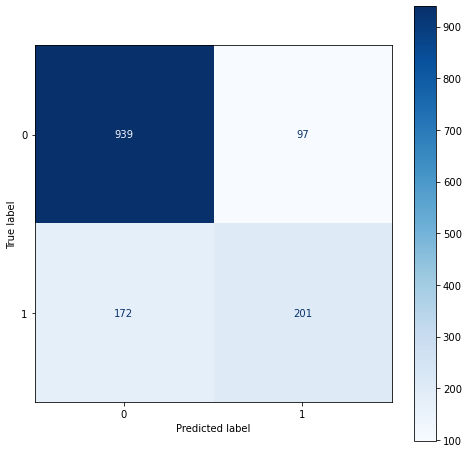

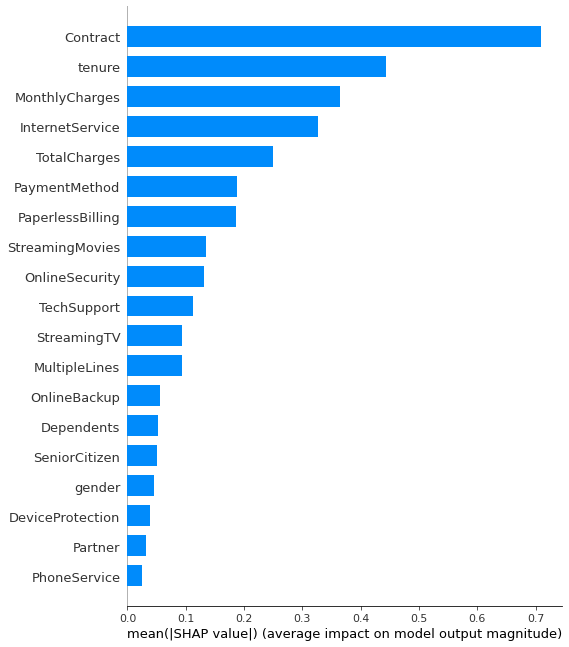

Confusion matrix <catboost.core.CatBoostClassifier object at 0x0000028F1EC69700>


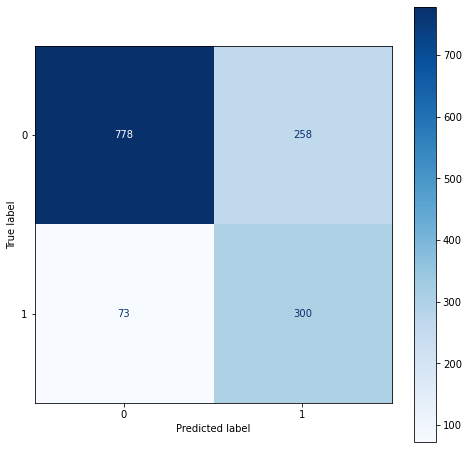

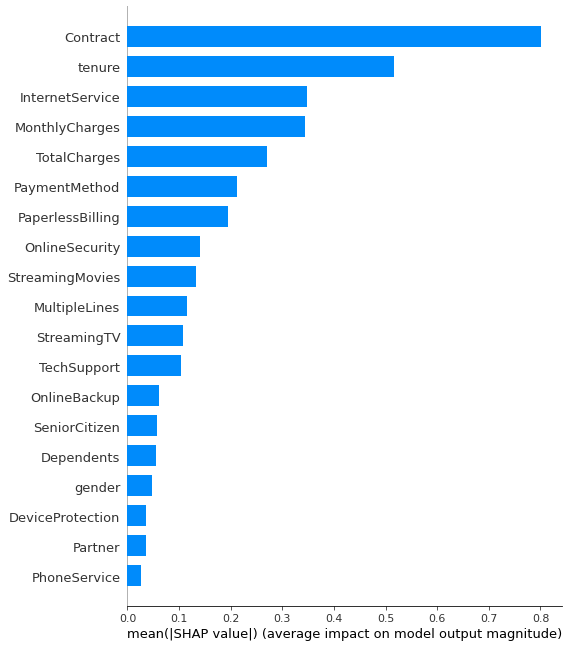

Confusion matrix <catboost.core.CatBoostClassifier object at 0x0000028F1EC69580>


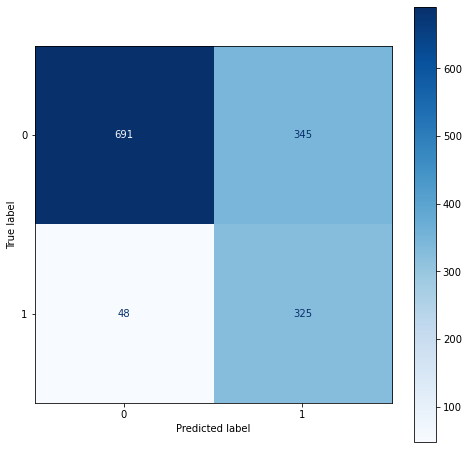

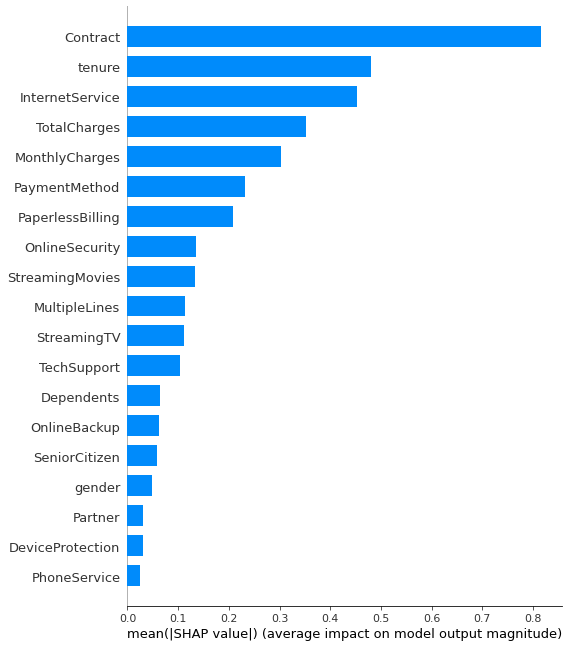

Confusion matrix XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


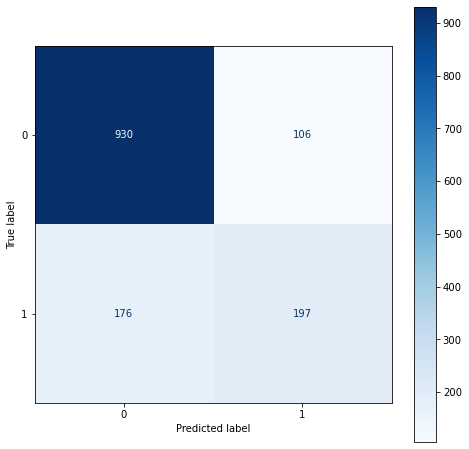

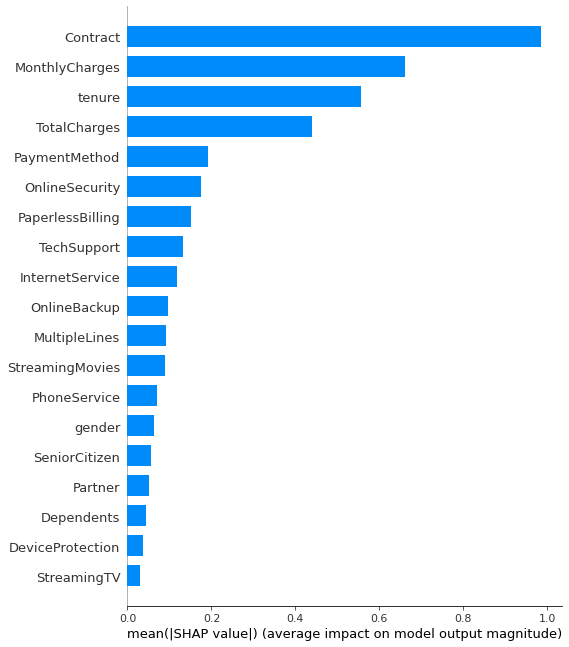

Confusion matrix XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


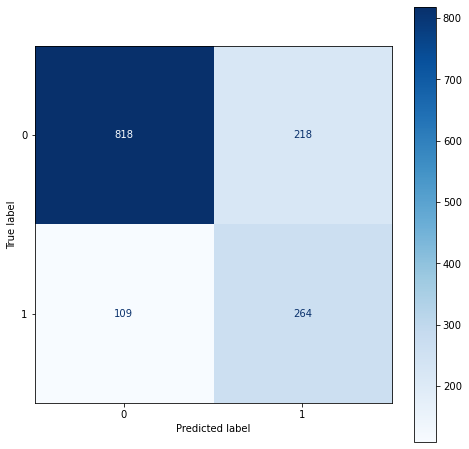

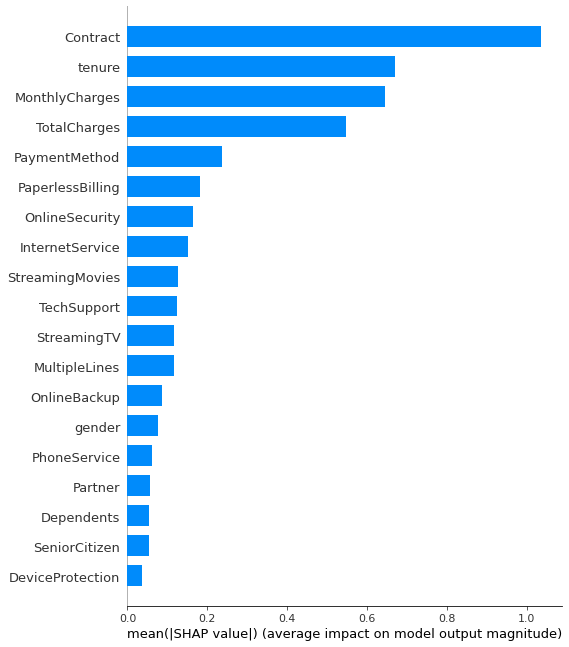

Confusion matrix XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


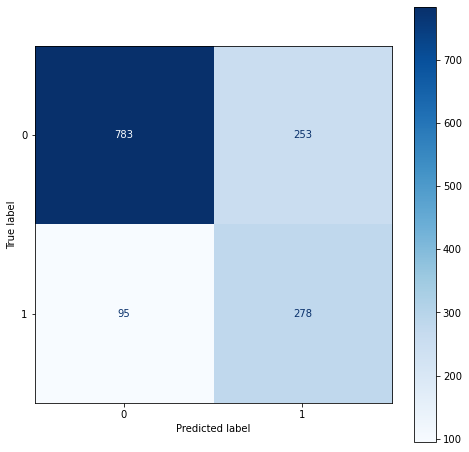

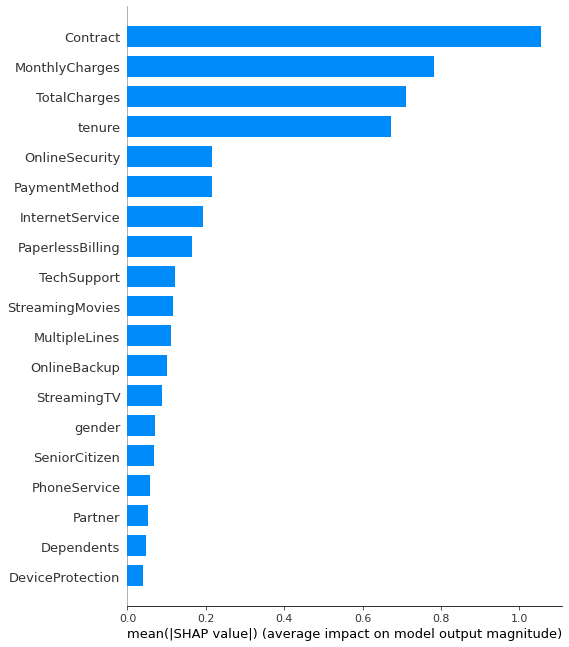

Confusion matrix LGBMClassifier(random_state=0)


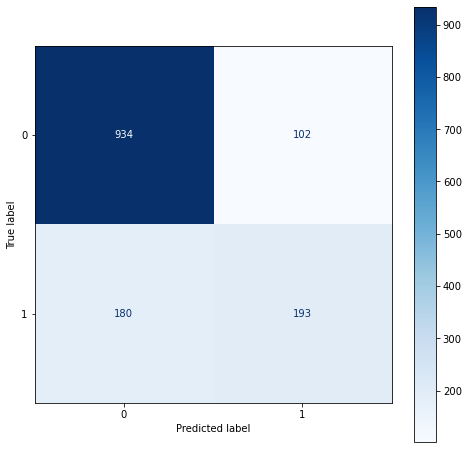

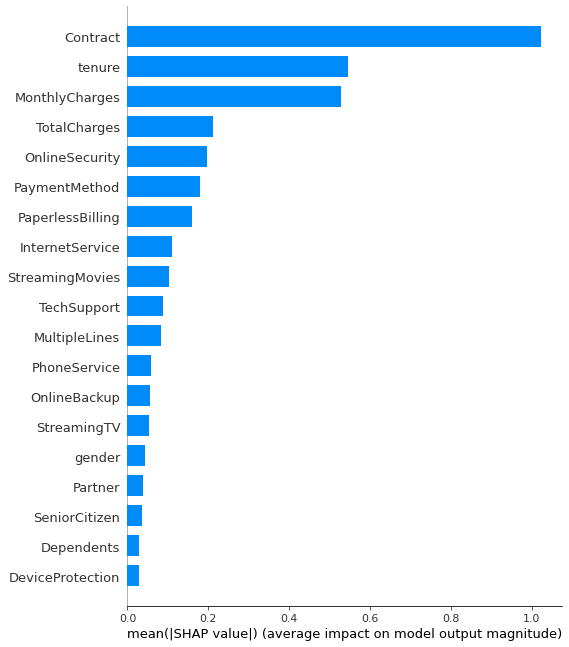

Confusion matrix LGBMClassifier(random_state=0, scale_pos_weight=3)


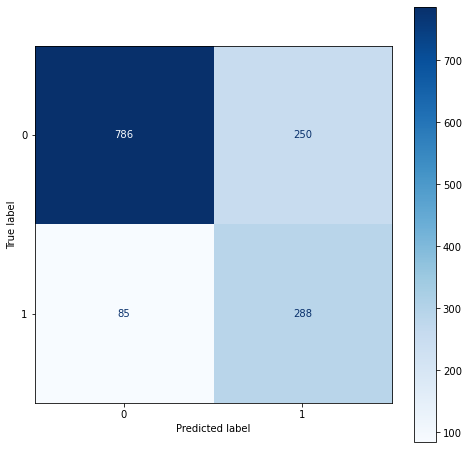

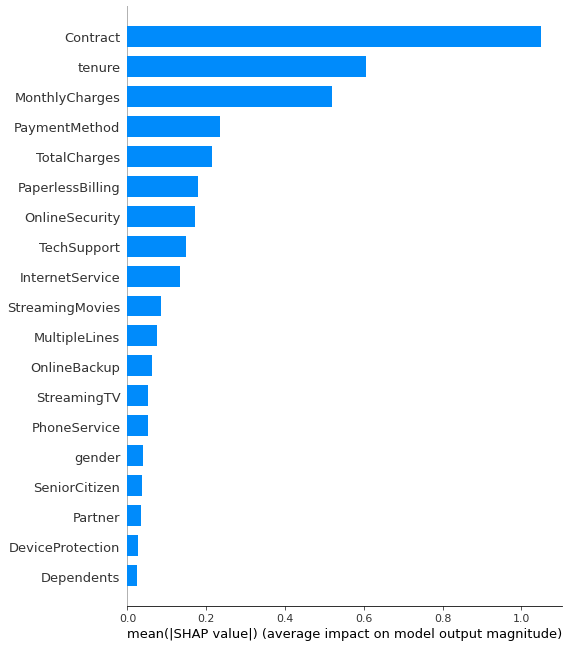

Confusion matrix LGBMClassifier(random_state=0, scale_pos_weight=5)


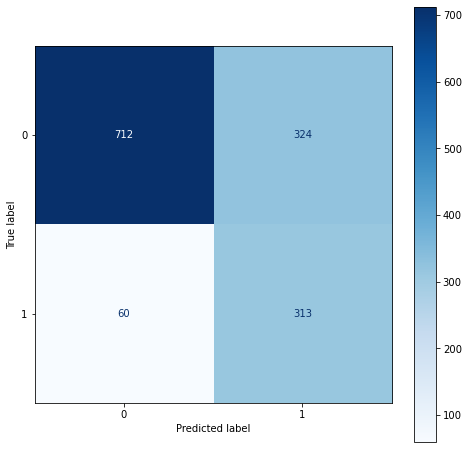

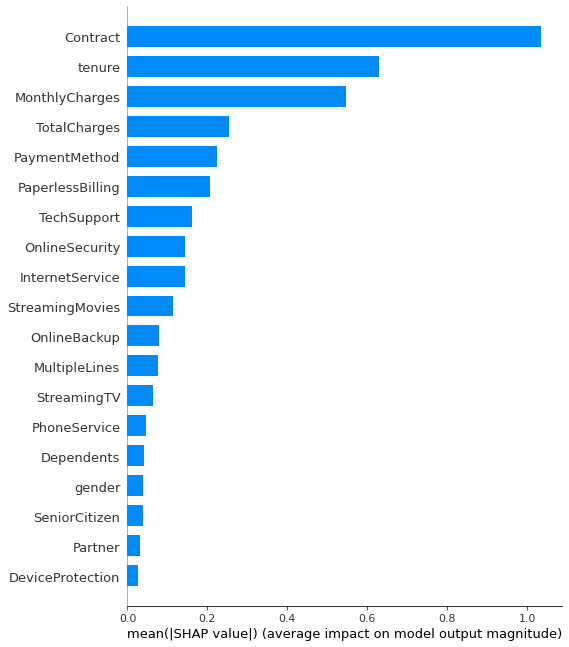

,Model,Accuracy,Precision,Recall,Roc_Auc
0,<catboost.core.CatBoostClassifier object at 0x...,0.809,0.674,0.539,0.723
1,<catboost.core.CatBoostClassifier object at 0x...,0.765,0.538,0.804,0.778
2,<catboost.core.CatBoostClassifier object at 0x...,0.721,0.485,0.871,0.769
3,XGBClassifier,0.8,0.65,0.528,0.713
4,XGBClassifier,0.768,0.548,0.708,0.749
5,XGBClassifier,0.753,0.524,0.745,0.751
6,LGBMClassifier,0.8,0.654,0.517,0.709
7,LGBMClassifier,0.762,0.535,0.772,0.765
8,LGBMClassifier,0.727,0.491,0.839,0.763


In [74]:
ml_models = [
    CatBoostClassifier(random_state=0),
    CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=3),
    CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=5), 
    XGBClassifier(random_state=0), 
    XGBClassifier(random_state=0,scale_pos_weight=3), 
    XGBClassifier(random_state=0,scale_pos_weight=5),
    LGBMClassifier(random_state=0), 
    LGBMClassifier(random_state=0,scale_pos_weight=3), 
    LGBMClassifier(random_state=0,scale_pos_weight=5),
]
results = pd.DataFrame(columns = ["Model",'Accuracy', 'Precision' , 'Recall', 'Roc_Auc'])
for i in ml_models: 
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)
    print('Confusion matrix', model)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);
    # SHAP summary Plot
    explainer = shap.TreeExplainer(model)
    shap_values_cat_test = explainer.shap_values(X_test)
    shap_values_cat_train = explainer.shap_values(X_train)
    fig, ax = plt.subplots(figsize=(8, 8))
    shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar")

    results = results.append({"Model" : str(i).split('(')[0], "Accuracy": accuracy, "Precision": precision, "Recall": recall, "Roc_Auc": roc_auc}, ignore_index = True)
results


In [75]:
# Final results table
results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,<catboost.core.CatBoostClassifier object at 0x...,0.809,0.674,0.539,0.723
1,<catboost.core.CatBoostClassifier object at 0x...,0.765,0.538,0.804,0.778
2,<catboost.core.CatBoostClassifier object at 0x...,0.721,0.485,0.871,0.769
3,XGBClassifier,0.8,0.65,0.528,0.713
4,XGBClassifier,0.768,0.548,0.708,0.749
5,XGBClassifier,0.753,0.524,0.745,0.751
6,LGBMClassifier,0.8,0.654,0.517,0.709
7,LGBMClassifier,0.762,0.535,0.772,0.765
8,LGBMClassifier,0.727,0.491,0.839,0.763


In [79]:
results.sort_values(by=['Recall'], ascending=False,inplace=True)

In [80]:
results

,Model,Accuracy,Precision,Recall,Roc_Auc
2,<catboost.core.CatBoostClassifier object at 0x...,0.721,0.485,0.871,0.769
8,LGBMClassifier,0.727,0.491,0.839,0.763
1,<catboost.core.CatBoostClassifier object at 0x...,0.765,0.538,0.804,0.778
7,LGBMClassifier,0.762,0.535,0.772,0.765
5,XGBClassifier,0.753,0.524,0.745,0.751
4,XGBClassifier,0.768,0.548,0.708,0.749
0,<catboost.core.CatBoostClassifier object at 0x...,0.809,0.674,0.539,0.723
3,XGBClassifier,0.8,0.65,0.528,0.713
6,LGBMClassifier,0.8,0.654,0.517,0.709


#### Conclusion 
1. We looked at the CatBoost, XGBoost and LightGBM and showed how they deal with imbalanced data internally.
2. In general, boosting algorithms do good job even on imbalanced data.
3. They produce good results on the imbalanced daata by giving an opportunity to focus more on the minority class and accordingly tune the training algorithm.
4. CatBoost, XGBoost and LightGBM use scale_pos_weight hyperparameter to tune the training algrotih for the imbalanced data.
5. scale_pos_weight is 1 by default. Both major class and minority class get the same weight.
6. When dealing with imbalanced daya, story changes a bit.
scale_pos_weight gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)
7. By adjusting the weight, minority class got 3 times more impact and 3 times more correction than errors made on the majority class.
8. We also observed that when we changed scale_pos_weight from 3 to 5 , we have observed significant increase on the recall score.
9. Two important point,
by changing scale_pos_weight we observed changes on the recall, accuracy, roc-auc, precision score
If we use extreme values for the scale_pos_weight, we can overfit the minority class and model could make worse predictions.